Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

## Questions

1. Where are the hotels Placed?
2. Which neighbourhoods are the most popular?
3. How does the price vary with area?

In [23]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline

ab_nyc = pd.read_csv('./datasets/AB_NYC_2019.csv') 
ab_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Text(0, 0.5, 'Neighbourhood_group Count')

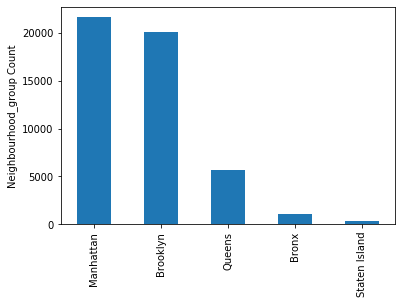

In [24]:
ab_nyc.neighbourhood_group.value_counts().plot(kind='bar')
plt.ylabel('Neighbourhood_group Count')

Manhatten and Brooklyn have the highest share of hotels

Text(0, 0.5, 'Neighbourhood Count')

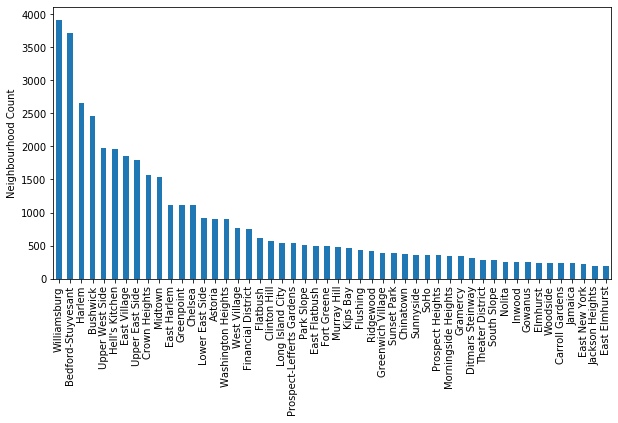

In [25]:
ab_nyc.neighbourhood.value_counts()[0:50].plot(kind='bar', figsize=(10,5))
plt.ylabel('Neighbourhood Count')

These are 50 highest popular neighbourhoods. 

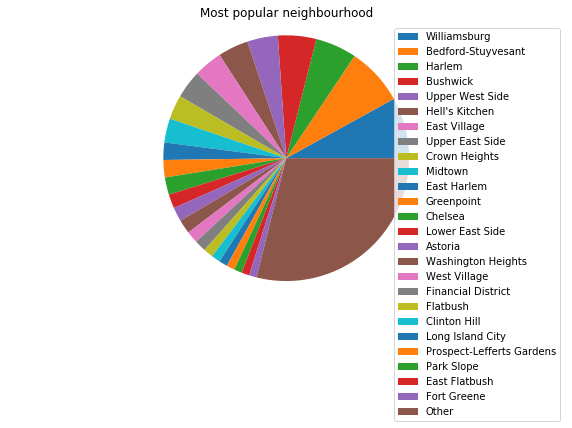

In [26]:
# Create numeric counts
neighbourhood_counts = pd.DataFrame(ab_nyc.neighbourhood.value_counts())

def neighbourhood_counts_25(dataFrame):
    other = int(dataFrame[25:].sum())
    neighbourhood_counts_25 = dataFrame[:25]
    neighbourhood_counts_25.loc[26] = other
    neighbourhood_counts_25 = neighbourhood_counts_25.rename(index={26: 'Other'})
    return neighbourhood_counts_25

neighbourhood_counts_25 = neighbourhood_counts_25(neighbourhood_counts)

# Generate Pie Chart
plt.figure(figsize=(10, 5))
plt.pie(neighbourhood_counts_25.neighbourhood)
plt.axis('equal')
plt.title('Most popular neighbourhood')
plt.legend(neighbourhood_counts_25.index)

These are 25 highest popular neighbourhoods. 

### Lets Check How the price varies with area

In [27]:
df = pd.DataFrame(ab_nyc)[['neighbourhood', 'price']]
byNeighbourhood = df.groupby('neighbourhood').aggregate(np.mean)
byNeighbourhood['neighbourhood_counts'] = neighbourhood_counts
byNeighbourhood

,price,neighbourhood_counts
neighbourhood,,
Allerton,87.595238,42
Arden Heights,67.250000,4
Arrochar,115.000000,21
Arverne,171.779221,77
Astoria,117.187778,900
...,...,...
Windsor Terrace,138.993631,157
Woodhaven,67.170455,88
Woodlawn,60.090909,11


In [28]:
def byNeighbourhood_50(dataFrame):
    byNeighbourhood_50 = dataFrame.sort_values(by=['neighbourhood_counts'], ascending=False)[:50]
    byNeighbourhood_50 = byNeighbourhood_50.sort_values(by=['price'], ascending=False).drop(columns=['neighbourhood_counts'])
    byNeighbourhood_50 = byNeighbourhood_50.rename(columns={'price': 'price_mean'})
    return byNeighbourhood_50

byNeighbourhood_50 = byNeighbourhood_50(byNeighbourhood)
byNeighbourhood_50

,price_mean
neighbourhood,
SoHo,287.103352
Midtown,282.719094
West Village,267.682292
Greenwich Village,263.405612
Chelsea,249.738544
Theater District,248.013889
Nolita,230.138340
Financial District,225.490591
Gramercy,222.754438


Text(0, 0.5, 'Price Mean')

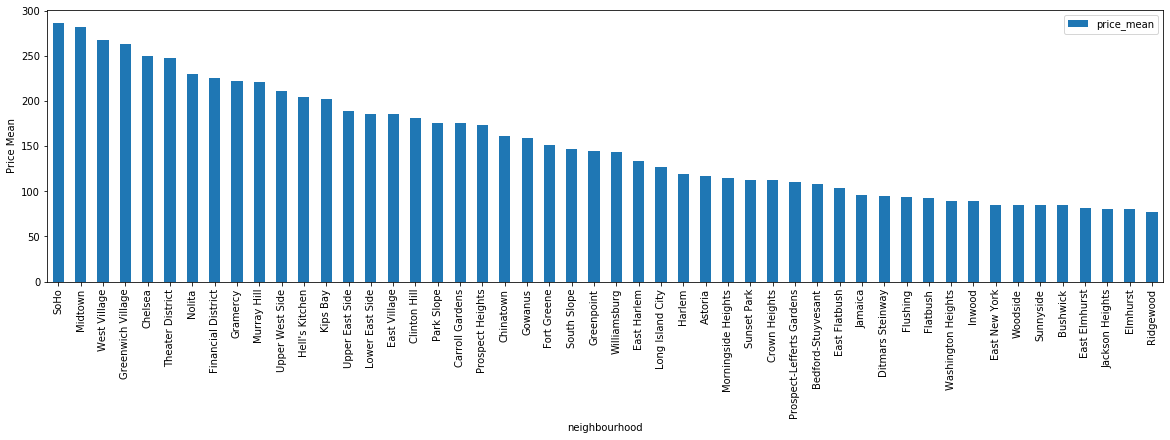

In [29]:
byNeighbourhood_50.plot(kind='bar', figsize=(20,5))
plt.ylabel('Price Mean')

This chart shows means of prices by neighbourhoods.


Soho and Midtown are the most expensive neighbourhoods.

In [30]:
def geometry(col1,col2):
    geometry = [Point(xy) for xy in zip( ab_nyc[col1], ab_nyc[col2] )]
    return geometry
geometry = geometry('longitude', 'latitude')
geometry[:3]

In [31]:
geo_df = gpd.GeoDataFrame(ab_nyc, geometry = geometry)
geo_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98376999999999 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.9419 40.80902)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (-73.95976 40.68514)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)


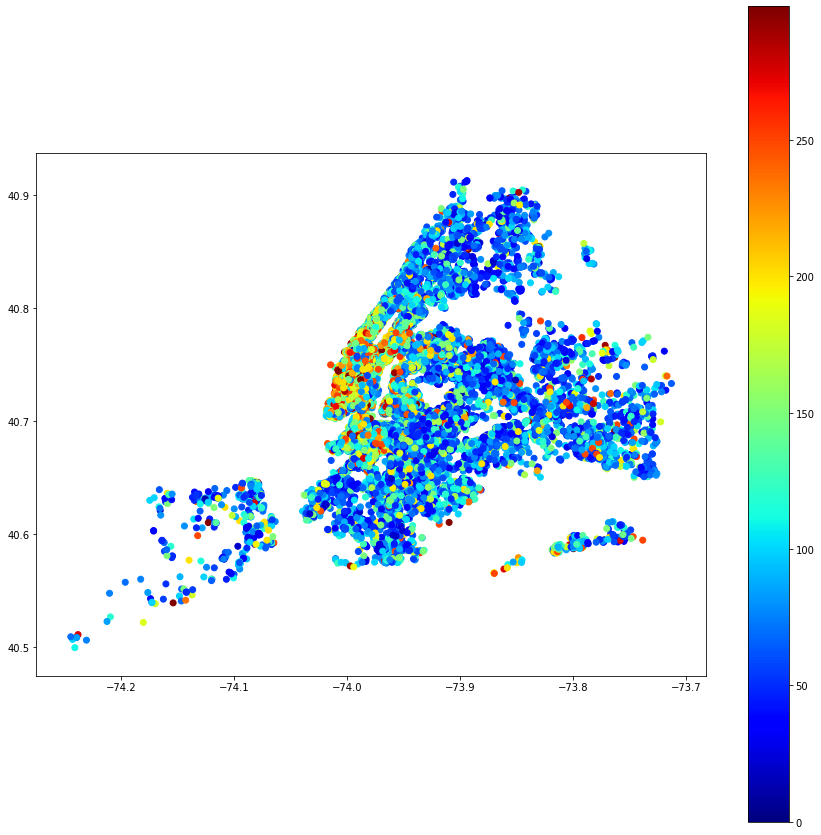

In [32]:
geo_df[geo_df['price'] < 300].plot(cmap = 'jet', 
                                   column = 'price', 
                                   figsize = (15,15),
                                   legend=True,
                                   legend_kwds={'label': "Population by Country",
                                                'orientation': "horizontal"}                                  )

Red color dots are the apartment or rooms with higher price.
Manhattan has the most expensive accomodations.

### Proposal for a realistic future research project

I would like to research that how these airbnb prices impact actuall rent and what kind of relationships there are between the popularity of area and traffic.